## Implemention of The Perceptron Algorithm

---

### Part 1. Iris data set (non-linearly seperable example)
Using "versicolor" and "virginica" flowers in iris data set to rerun the perceptron model.

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from mlxtend.plotting import plot_decision_regions # pip install mlxtend

sns.set_theme()

df = pd.read_csv("Datasets/iris_dataset.csv")

In [49]:
df[(df.species == "versicolor") | (df.species == "virginica")] 
# select the species of "versicolor" and "virginica"
# seems like their location are rows between 50 and 149(inclusive)
# replaced with df.iloc[50:150] in the following code

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [50]:
sns.pairplot(df.iloc[50:150], hue  = "species")
# According to the plot, possible choice of measurements may not be ("sepal_length","sepal_width")
# Therefore we'll try some other measurements

In [51]:
class Perceptron(object):
    def __init__(self, eta = .5, epochs = 50):
        self.eta = eta
        self.epochs = epochs
        
    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update*xi
                self.w_[-1] -= update
                errors += int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors_.append(errors)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

---

#### Measurements Choices
* "sepal_length" and "petal_length"

[ True  True  True  True  True False False  True  True  True  True  True
  True False  True  True False  True  True  True False  True False False
  True  True  True False False  True  True  True  True False False False
  True  True  True  True False False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


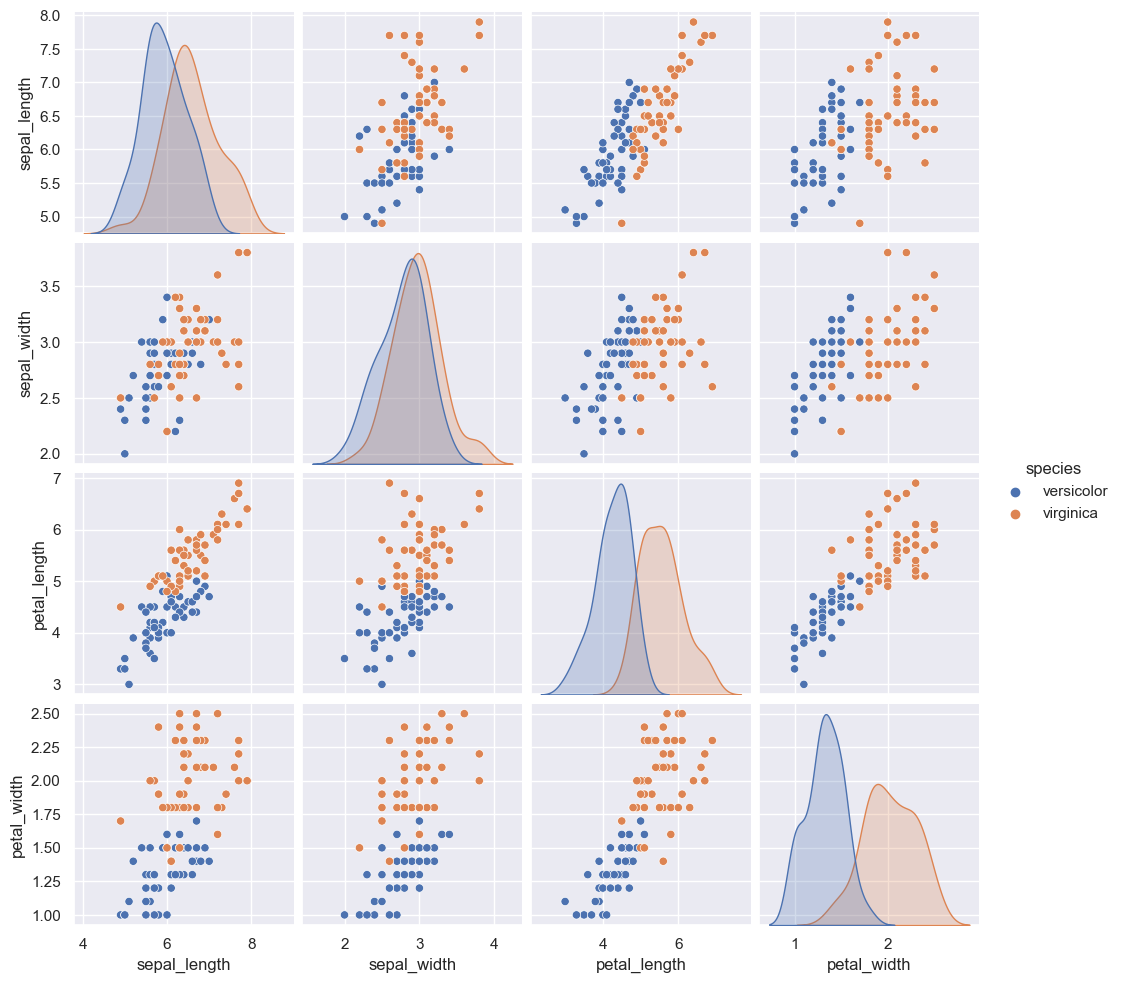

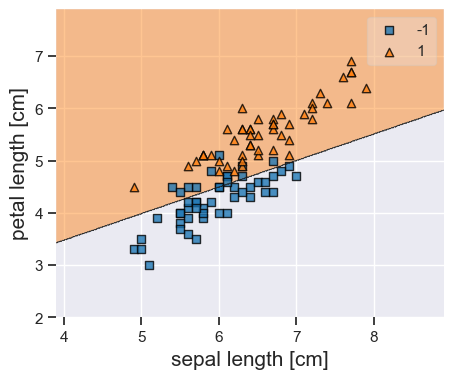

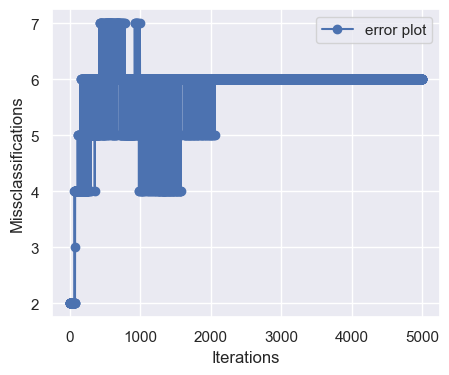

In [52]:
y = df.iloc[50:150].species.values
y = np.where(y =="versicolor", -1, 1) # value "versicolor" == -1; "virginica" == 1
X = df[["sepal_length", "petal_length"]].iloc[50:150].values # choose measurements as ("sepal_length","petal_length")
# training
percep = Perceptron(epochs = 5000)
percep.train(X, y)
# predict and result comparison
y_hat = percep.predict(X)
print(y == y_hat)
# desicion plot
plt.figure(figsize = (5, 4))
plot_decision_regions(X, y, clf = percep)
plt.xlabel("sepal length [cm]", fontsize = 15)
plt.ylabel("petal length [cm]", fontsize = 15)
plt.show()
# error plot
plt.figure(figsize = (5, 4))
plt.plot(range(1, len(percep.errors_)+1), percep.errors_, 
         marker = "o",
         label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.legend()
plt.show()


* "sepal_length" and "petal_width"

[ True False  True False False  True False  True  True False  True False
  True False  True  True False  True False  True False  True False  True
  True  True  True False False  True  True  True  True False False False
 False  True  True False  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


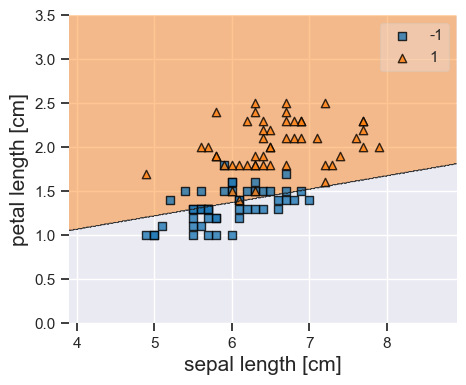

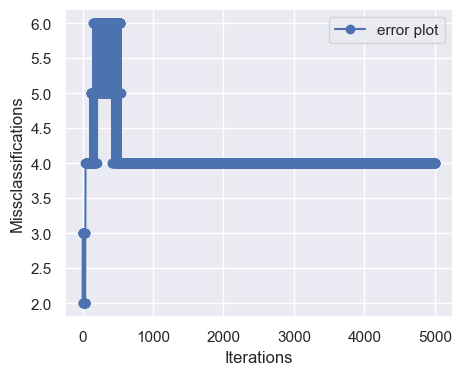

In [53]:
X = df[["sepal_length", "petal_width"]].iloc[50:150].values # choose measurements as ("sepal_length","petal_width")
# training
percep = Perceptron(epochs = 5000)
percep.train(X, y)
# predict and result comparison
y_hat = percep.predict(X)
print(y == y_hat)
# desicion plot
plt.figure(figsize = (5, 4))
plot_decision_regions(X, y, clf = percep)
plt.xlabel("sepal length [cm]", fontsize = 15)
plt.ylabel("petal length [cm]", fontsize = 15)
plt.show()
# error plot
plt.figure(figsize = (5, 4))
plt.plot(range(1, len(percep.errors_)+1), percep.errors_, 
         marker = "o",
         label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.legend()
plt.show()

* "sepal_width" and "petal_length"

[ True  True False  True False False  True  True False  True  True  True
  True False  True  True  True  True False  True False  True False False
  True  True False False  True  True  True  True  True False  True  True
 False False  True  True False False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


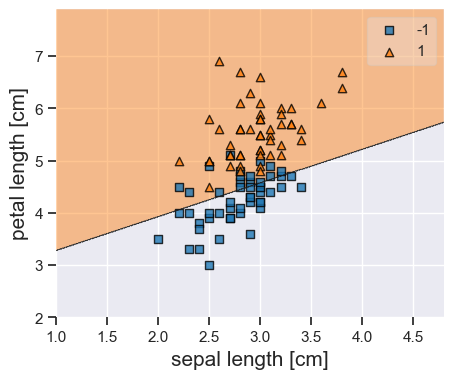

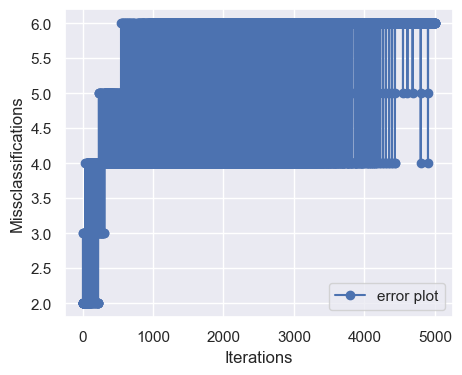

In [54]:
X = df[["sepal_width", "petal_length"]].iloc[50:150].values 
# training
percep = Perceptron(epochs = 5000)
percep.train(X, y)
# predict and result comparison
y_hat = percep.predict(X)
print(y == y_hat)
# desicion plot
plt.figure(figsize = (5, 4))
plot_decision_regions(X, y, clf = percep)
plt.xlabel("sepal length [cm]", fontsize = 15)
plt.ylabel("petal length [cm]", fontsize = 15)
plt.show()
# error plot
plt.figure(figsize = (5, 4))
plt.plot(range(1, len(percep.errors_)+1), percep.errors_, 
         marker = "o",
         label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.legend()
plt.show()

* "sepal_width" and "petal_width"

[ True  True False False False  True False  True  True False  True False
  True  True  True  True False  True False  True False  True False  True
  True  True False False False  True  True  True  True False False False
 False False  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


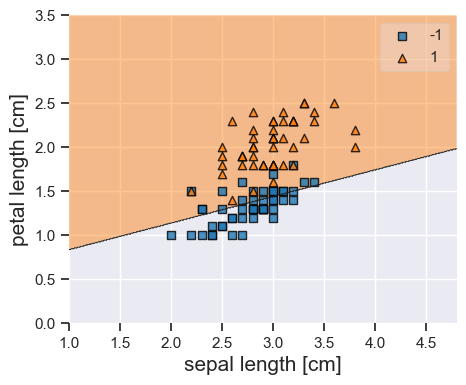

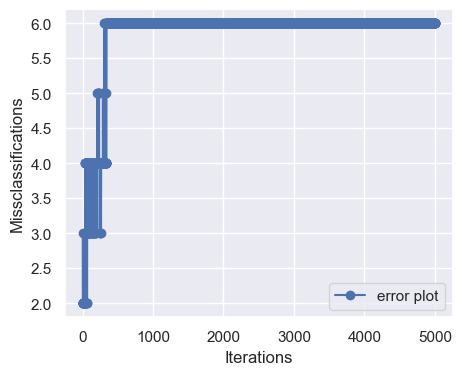

In [55]:
X = df[["sepal_width", "petal_width"]].iloc[50:150].values 
# training
percep = Perceptron(epochs = 5000)
percep.train(X, y)
# predict and result comparison
y_hat = percep.predict(X)
print(y == y_hat)
# desicion plot
plt.figure(figsize = (5, 4))
plot_decision_regions(X, y, clf = percep)
plt.xlabel("sepal length [cm]", fontsize = 15)
plt.ylabel("petal length [cm]", fontsize = 15)
plt.show()
# error plot
plt.figure(figsize = (5, 4))
plt.plot(range(1, len(percep.errors_)+1), percep.errors_, 
         marker = "o",
         label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.legend()
plt.show()

* "petal_length" and "petal_width"

[False False False  True False  True False  True  True  True  True False
  True False  True  True False  True False  True False  True False  True
  True  True False False False  True  True  True  True False False False
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


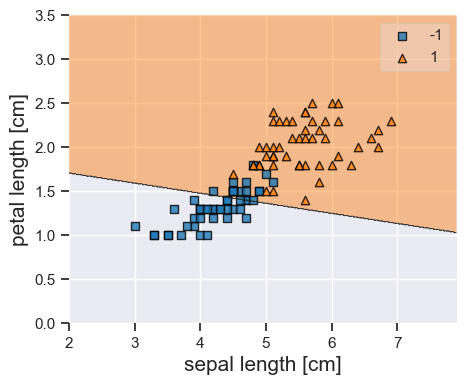

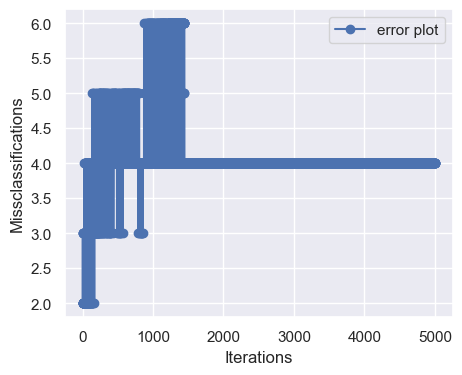

In [57]:
X = df[["petal_length", "petal_width"]].iloc[50:150].values 
# training
percep = Perceptron(epochs = 5000)
percep.train(X, y)
# predict and result comparison
y_hat = percep.predict(X)
print(y == y_hat)
# desicion plot
plt.figure(figsize = (5, 4))
plot_decision_regions(X, y, clf = percep)
plt.xlabel("sepal length [cm]", fontsize = 15)
plt.ylabel("petal length [cm]", fontsize = 15)
plt.show()
# error plot
plt.figure(figsize = (5, 4))
plt.plot(range(1, len(percep.errors_)+1), percep.errors_, 
         marker = "o",
         label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.legend()
plt.show()

---

### Conclusion

Using the species of "versicolor" and "virginica" Flowers in the iris data set, along with different possible measurements:
- "sepal_length" and "petal_length"
- "sepal_length" and "petal_width"
- "sepal_width" and "petal_length"
- "sepal_width" and "petal_width"
- "petal_length" and "petal_width"

*Notes*: Measurement "sepal_length" and "sepal_width" doesn't take into consideration since from the pairplot, the points of that measurement overlap a lot.

Since the 2 species are not linear seperable, there always remains some misclassifications when running the model. But From the error plots we can conclude that the measurements of ("sepal_length" , "petal_width") and ("petal_length" , "petal_width") are more accurate when classify the 2 species of "versicolor" and "virginica".

---